### TODO:

- Replay Memory: written first version
    - add batches of transitions
    - changed _batch_random to return a tuple since tf.data.Dataset is for largedatasets
    - bug: when sampling a minibatch with a uncomplete replay memory empty entries might be selected
- Preprocessing:
    - transform the frames to tensorflow tensors asap and try to use tf.function where possible
    - try to do the preprocessing in batches to use parallelism
    - try to use lazy loading and prefetching as well
- DQN Model
    - Written a CNN model with custom loss function
    - check if the compile is still neeeded
    - check if I should write the class as a more general module and not subclass of Sequential
- DQN Agent
    - started writing
    - update_step vectorized (and could also be decorated with tf.function)
    - need to see if I want to make larger batch or more batches for one update_step
    - Training loop
        - needs to be checked what should be vectorized
        - need to substitute python and numpy code with tensorflow code
        - optimize for graph computations
- Use a profilier to optimize code

### Stories

- bugfix: cast predicted action from tensor to scalar
- bugfix: fix selecting empty transitions, replace TensorArrays with Tensors
- feature: plot for training history
- feature: saves and loads memory from disk
- feature: saves and loads model to disk / maybe only (model weights, history)
- feature: DiskReplayMemory class for replay memory that don't fit into RAM

### Code

In [1]:
import os
import time

os.chdir('/home/harisc/repos/deep-q-learning')
os.getcwd()

'/home/harisc/repos/deep-q-learning'

In [2]:
from src.agents.dqn_agent import SpaceInvaderAgent

2023-12-24 18:46:51.575188: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-24 18:46:51.614883: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-24 18:46:51.614911: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-24 18:46:51.616147: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-24 18:46:51.622493: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-24 18:46:51.622922: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [4]:
from tensorflow import constant

learning_rate = 0.001
memory_size = constant(500) # 10**4 # 3 * 10**5
batch_size = constant(32) # 32
max_train_frames = 1000 # 5 * 10**4 # 4.5 * 10**5
update_main_freq = 4
update_target_freq = 250 # 0.25 * 10**4 # 10**4
average_loss_freq = 200 # 400
memory_warmup = 200 # 0.5 * 10**4 # 5*10**4
discount = 0.99

eval_episodes = 10

In [5]:
my_agent = SpaceInvaderAgent(
    learning_rate = learning_rate,
    memory_size = memory_size,
    batch_size = batch_size,
    max_train_frames = max_train_frames,
    update_main_freq = update_main_freq,
    update_target_freq = update_target_freq,
    average_loss_freq = average_loss_freq,
    memory_warmup = memory_warmup,
    discount = discount,
    eval_episodes = eval_episodes
)

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


In [6]:
my_agent.train()

/home/harisc/repos/deep-q-learning/dqn/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Updating target model...
Finished 400 frames. Loss: 5.8868117
Updating target model...
Episode finished. Reward: 230.0
Finished 600 frames. Loss: 0.8883535
Updating target model...
Finished 800 frames. Loss: 0.653037
Episode finished. Reward: 110.0
Episode finished. Reward: 45.0


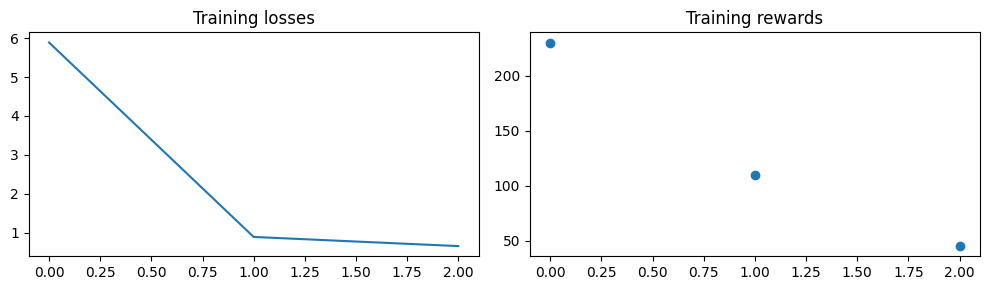

In [7]:
my_agent.plot_history()

In [ ]:
#%prun my_agent.train()

In [ ]:
import tensorflow as tf